In [2]:
import pandas as pd

# Leer el CSV
df = pd.read_csv('../data/data_divorce.csv')

## Descripción General del Conjunto de Datos

In [3]:
# Descripcion del conjunto de datos
filas, columnas = df.shape
print(f"Total de registros/observaciones: {filas}")
print(f"Total de variables/columnas: {columnas}")


Total de registros/observaciones: 71576
Total de variables/columnas: 18


Listado de Variables con Tipo y Descripción

In [4]:
# Diccionario con descripción de variables
descripcion_variables = {
    'DEPREG': 'Departamento de registro del divorcio',
    'MUPREG': 'Municipio de registro del divorcio',
    'MESREG': 'Mes de registro del divorcio',
    'AÑOREG': 'Año de registro del divorcio',
    'DIAOCU': 'Día de ocurrencia del divorcio',
    'MESOCU': 'Mes de ocurrencia del divorcio',
    'DEPOCU': 'Departamento de ocurrencia del divorcio',
    'MUPOCU': 'Municipio de ocurrencia del divorcio',
    'EDADHOM': 'Edad del hombre al momento del divorcio',
    'EDADMUJ': 'Edad de la mujer al momento del divorcio',
    'GETHOM': 'Grupo étnico del hombre',
    'GETMUJ': 'Grupo étnico de la mujer',
    'NACHOM': 'Nacionalidad del hombre',
    'NACMUJ': 'Nacionalidad de la mujer',
    'ESCHOM': 'Nivel educativo del hombre',
    'ESCMUJ': 'Nivel educativo de la mujer',
    'OCUHOM': 'Ocupación del hombre',
    'OCUMUJ': 'Ocupación de la mujer'
}

# Clasificación de variables por tipo
variables_categoricas = ['DEPREG', 'MUPREG', 'MESREG', 'MESOCU', 'DEPOCU', 'MUPOCU',
                         'GETHOM', 'GETMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ',
                         'OCUHOM', 'OCUMUJ']

variables_numericas = ['AÑOREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ']

# Crear tabla descriptiva
tabla_variables = pd.DataFrame({
    'Variable': df.columns,
    'Descripción': [descripcion_variables.get(col, 'Sin descripción') for col in df.columns],
    'Tipo de Dato': df.dtypes.astype(str),
    'Clasificación': ['Numérica' if col in variables_numericas else 'Categórica' for col in df.columns],
    'Valores Únicos': [df[col].nunique() for col in df.columns],
    'Valores Nulos': [df[col].isnull().sum() for col in df.columns]
})

tabla_variables

,Variable,Descripción,Tipo de Dato,Clasificación,Valores Únicos,Valores Nulos
DEPREG,DEPREG,Departamento de registro del divorcio,object,Categórica,22,0
MUPREG,MUPREG,Municipio de registro del divorcio,object,Categórica,331,0
MESREG,MESREG,Mes de registro del divorcio,object,Categórica,12,0
AÑOREG,AÑOREG,Año de registro del divorcio,float64,Numérica,12,0
DIAOCU,DIAOCU,Día de ocurrencia del divorcio,float64,Numérica,31,0
MESOCU,MESOCU,Mes de ocurrencia del divorcio,object,Categórica,12,0
DEPOCU,DEPOCU,Departamento de ocurrencia del divorcio,object,Categórica,22,0
MUPOCU,MUPOCU,Municipio de ocurrencia del divorcio,object,Categórica,331,0
EDADHOM,EDADHOM,Edad del hombre al momento del divorcio,object,Numérica,79,0
EDADMUJ,EDADMUJ,Edad de la mujer al momento del divorcio,object,Numérica,67,0


### Analisis exploratorio de variables categóricas
Tabla de frecuencias de las variables categoricas

In [5]:
# Elegir una de las variables categoricas
var_categoricas = ['DEPREG', 'MUPREG', 'MESREG', 'MESOCU', 'DEPOCU', 'MUPOCU', 'GETHOM', 'GETMUJ', 
                   'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'OCUHOM', 'OCUMUJ']

# Crear tabla de frecuencias
tabla_freq = pd.DataFrame({
    'Categoría': df['OCUMUJ'].value_counts().index,
    'Frecuencia': df['OCUMUJ'].value_counts().values,
    'Porcentaje': (df['OCUMUJ'].value_counts(normalize=True).values * 100).round(2)
})

# Ordenar por categoría
tabla_freq = tabla_freq.sort_values('Frecuencia', ascending= False).reset_index(drop=True)

#Imprimir tabla
tabla_freq

,Categoría,Frecuencia,Porcentaje
0,No especificado en otro grupo,34682,48.45
1,Ignorado,18259,25.51
2,Profesionales de la enseñanza,3653,5.10
3,Oficinistas,2701,3.77
4,Empleados contables y encargados del registro ...,1483,2.07
...,...,...,...
120,Empleados de control de abastecimientos e inve...,1,0.00
121,Agricultores y trabajadores calificados de cul...,1,0.00
122,Cuidadores de niños,1,0.00
123,Agricultores y trabajadores calificados de exp...,1,0.00


## Exploración de variables númericas

En esta sección se realiza un análisis exploratorio de las variables numéricas del conjunto de datos de divorcios registrados en Guatemala durante el periodo 2012–2023. El objetivo es describir su comportamiento mediante medidas estadísticas y visualizaciones básicas, sin utilizar herramientas automáticas de análisis.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/data_divorce.csv')

### Identificación de variables numéricas

Se identificaron cuatro variables numéricas en el conjunto de datos:

- AÑOREG: Año de registro del divorcio.
- DIAOCU: Día de ocurrencia del divorcio.
- EDADHOM: Edad del hombre al momento del divorcio.
- EDADMUJ: Edad de la mujer al momento del divorcio.


In [7]:
num_vars = ['AÑOREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ']
df[num_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71576 entries, 0 to 71575
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AÑOREG   71576 non-null  float64
 1   DIAOCU   71576 non-null  float64
 2   EDADHOM  71576 non-null  object 
 3   EDADMUJ  71576 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.2+ MB


### Medidas de tendencia central y dispersión

Medidas estadísticas descriptivas para las variables numéricas, incluyendo media, mediana, valores mínimos y máximos, así como medidas de dispersión.


In [8]:
for var in num_vars:
    print("\n" f"Descripción de {var}:")
    print(str(df[var].describe()))


Descripción de AÑOREG:
count    71576.00000
mean      2017.79060
std          3.24405
min       2012.00000
25%       2015.00000
50%       2018.00000
75%       2021.00000
max       2023.00000
Name: AÑOREG, dtype: float64

Descripción de DIAOCU:
count    71576.000000
mean        15.733584
std          8.683304
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: DIAOCU, dtype: float64

Descripción de EDADHOM:
count        71576
unique          79
top       Ignorado
freq         34795
Name: EDADHOM, dtype: object

Descripción de EDADMUJ:
count        71576
unique          67
top       Ignorado
freq         34721
Name: EDADMUJ, dtype: object


### Distribución de las variables numéricas

A continuación se presentan histogramas para analizar la forma de la distribución de las variables numéricas.

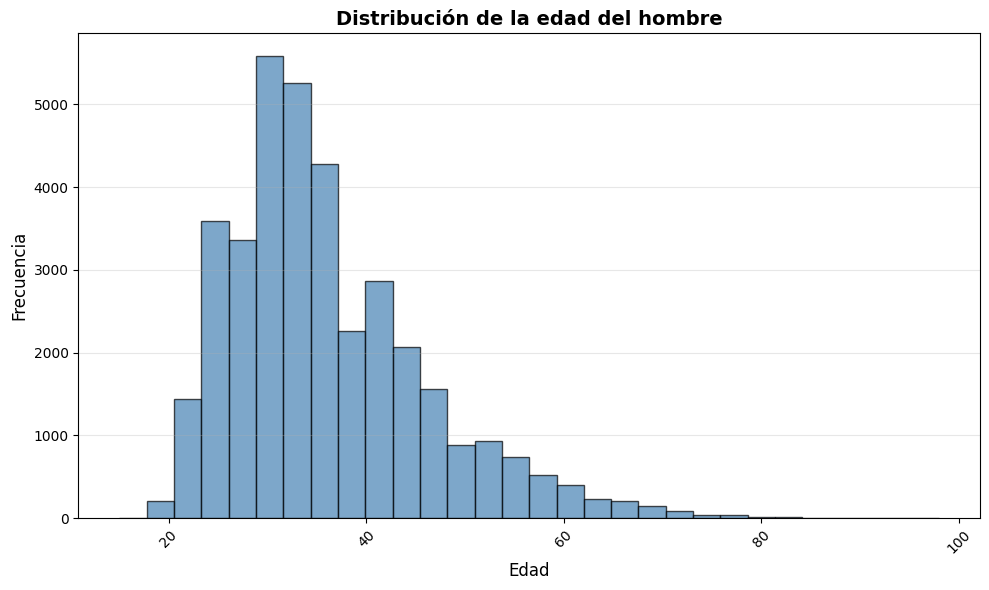

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(pd.to_numeric(df['EDADHOM'], errors='coerce'), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de la edad del hombre", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

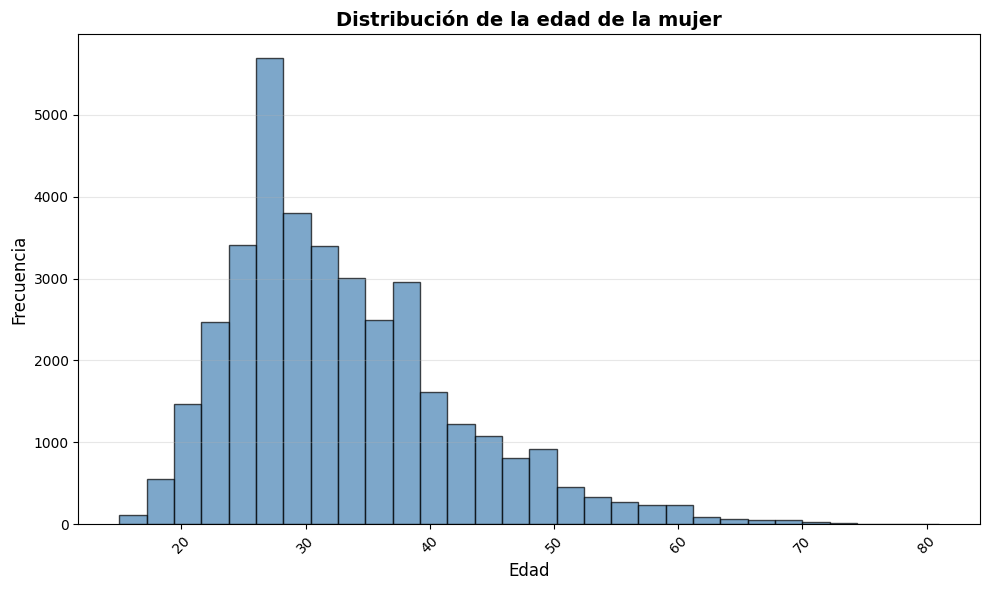

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(pd.to_numeric(df['EDADMUJ'], errors='coerce'), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.title("Distribución de la edad de la mujer", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Medidas de orden

Las medidas de orden, cuartiles, PARA identificar la dispersión de los datos y la presencia de valores extremos en las variables numéricas.

In [ ]:
df_numeric = df[num_vars].copy()
df_numeric['EDADHOM'] = pd.to_numeric(df['EDADHOM'], errors='coerce')
df_numeric['EDADMUJ'] = pd.to_numeric(df['EDADMUJ'], errors='coerce')

df_numeric.quantile([0.25, 0.5, 0.75])


,AÑOREG,DIAOCU,EDADHOM,EDADMUJ
0.25,2015.0,8.0,29.0,26.0
0.50,2018.0,16.0,34.0,31.0
0.75,2021.0,23.0,41.0,38.0
